Que. 3

Perform K-Means,Hierarchical and DBSCAN Clustering for the Universities.csv data and identify the number of clusters formed and Visualise the results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Universities.csv")
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [5]:
df.isna().sum()

Univ        0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

In [6]:
df.shape

(25, 7)

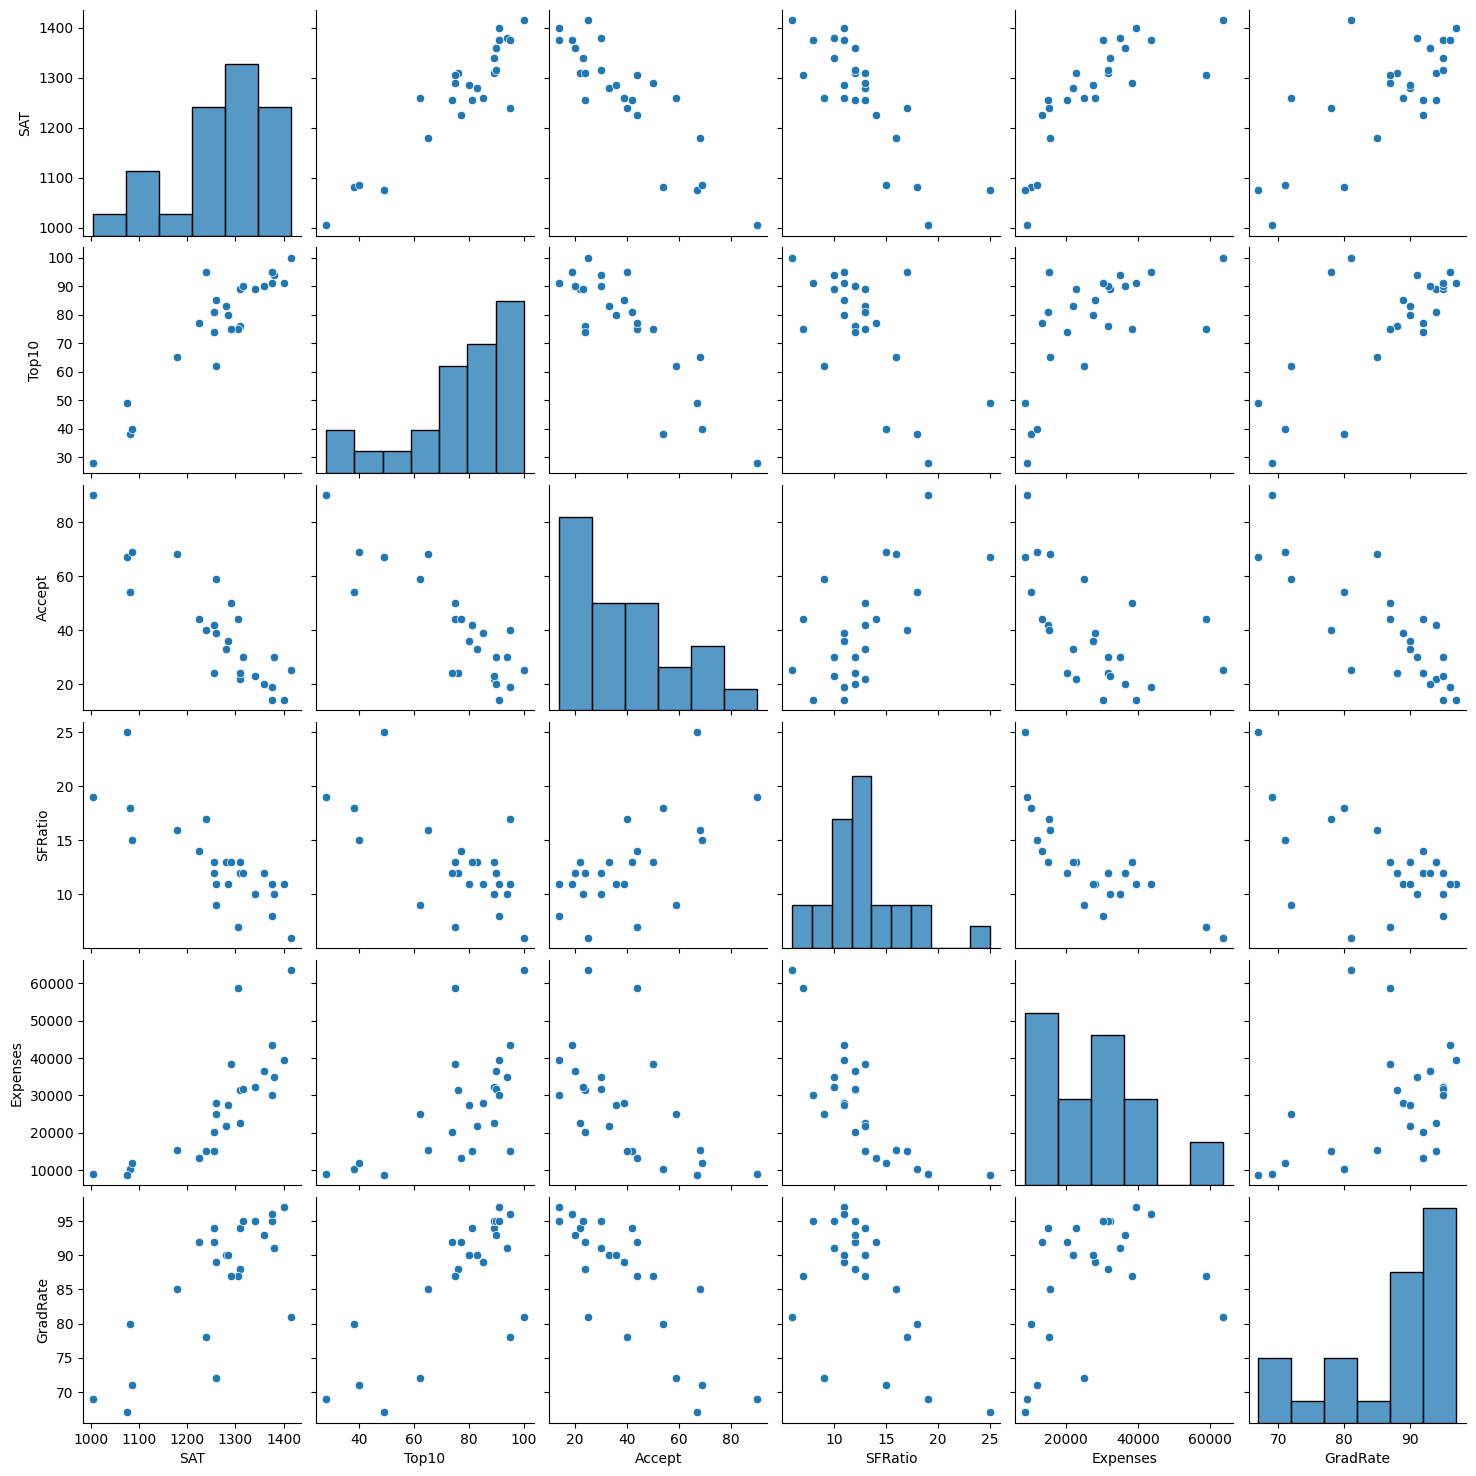

In [7]:
sns.pairplot(df)

In [8]:
df=df.drop('Univ',axis=1)

In [19]:
from sklearn.cluster import KMeans
wss=[]

for k in range(2,10):
    kmeans=KMeans(n_clusters=k)
    clusters_info=kmeans.fit(df)
    wss.append(clusters_info.inertia_)

In [20]:
wss

[1851050870.75,
 582713442.3560606,
 286377291.9444445,
 142348016.2916667,
 95877994.41666667,
 65048691.166666664,
 46125116.24999999,
 34191826.75]

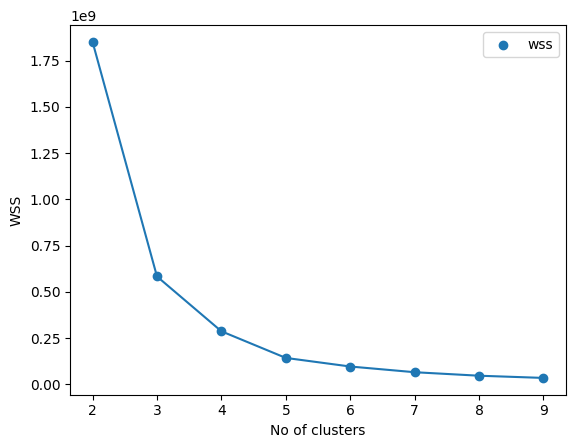

In [21]:
plt.scatter(range(2,10),wss,label='wss')
plt.plot(range(2,10),wss)
plt.xlabel("No of clusters")
plt.ylabel("WSS")
plt.legend()

In [22]:
clusters_info.labels_

array([7, 2, 5, 0, 7, 0, 0, 7, 6, 8, 0, 5, 3, 1, 0, 1, 6, 1, 3, 6, 3, 5,
       3, 1, 4], dtype=int32)

In [23]:
len(clusters_info.cluster_centers_)

9

In [24]:
kmeans=KMeans(n_clusters=4)
clusters_info=kmeans.fit(df)
   

In [26]:
clusters_info.labels_

array([2, 3, 2, 2, 2, 2, 2, 0, 1, 3, 1, 2, 0, 0, 2, 0, 1, 0, 0, 1, 0, 2,
       0, 0, 1], dtype=int32)

In [27]:
clusters_info.cluster_centers_

array([[1.15566667e+03, 6.07777778e+01, 5.53333333e+01, 1.65555556e+01,
        1.32243333e+04, 8.08888889e+01],
       [1.36100000e+03, 8.90000000e+01, 2.66000000e+01, 1.14000000e+01,
        3.85478000e+04, 9.28000000e+01],
       [1.30388889e+03, 8.27777778e+01, 3.11111111e+01, 1.10000000e+01,
        2.78528889e+04, 8.97777778e+01],
       [1.36000000e+03, 8.75000000e+01, 3.45000000e+01, 6.50000000e+00,
        6.11330000e+04, 8.40000000e+01]])

In [28]:
clusters_info.n_iter_

5

Text(0, 0.5, 'Top10')

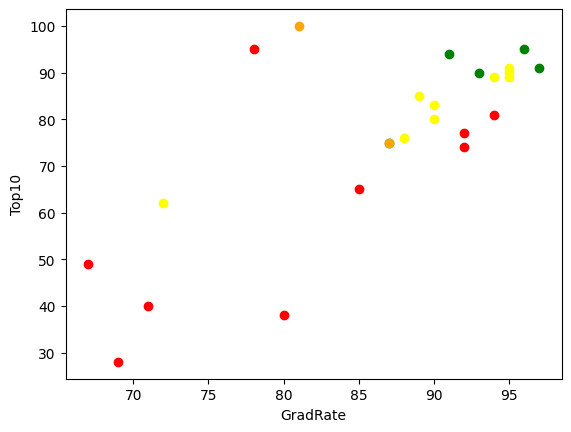

In [33]:
plt.scatter(df['GradRate'][clusters_info.labels_==0],df['Top10'][clusters_info.labels_==0],color="red")
plt.scatter(df['GradRate'][clusters_info.labels_==1],df['Top10'][clusters_info.labels_==1],color="green")
plt.scatter(df['GradRate'][clusters_info.labels_==2],df['Top10'][clusters_info.labels_==2],color="yellow")
plt.scatter(df['GradRate'][clusters_info.labels_==3],df['Top10'][clusters_info.labels_==3],color="orange")
plt.xlabel('GradRate')
plt.ylabel('Top10')
